In [7]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [8]:
# hyperparameters
input_size = 784
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 1e-3

In [9]:
# data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [10]:
# data loader
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=False)

In [11]:
# model
model = torch.nn.Linear(input_size, num_classes)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
# Training
loss_arr = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        
        # Forward
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss_arr.append(loss)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [13]:
# Testing
with torch.no_grad():
    c = 0
    t = 0
    for images,labels in test_loader:
        images = images.reshape(-1,28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        t += labels.size(0)
        c += (predicted==labels).sum()
    print("Accuracy: ",100*c/t)


Accuracy:  tensor(85)


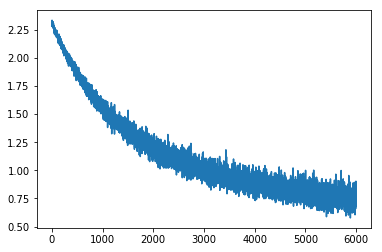

In [14]:
plt.plot(loss_arr)